# **House Price Prediction Note Book**

Upload the dataset.

In [58]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


Import all necessary libraries

In [59]:
# Import necessary libraries
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the dataset and display the first 5 rows.

In [60]:
# Load the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Display information about the dataset including column types and non-null values, and descriptive statistics.

In [61]:
# Get information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Display the shape of the dataset.

In [62]:
df.shape

(21613, 21)

Clean the data by dropping the 'id' and 'date' columns and filling any missing values with the mean of their respective columns.

In [63]:
# Data cleaning: Drop unnecessary columns and fill missing values
df = df.drop(['id', 'date'], axis=1)

#fill missing values
df.fillna(df.mean(), inplace=True)

Display the shape of the dataframe after cleaning.

In [64]:
df.shape

(21613, 19)

Select the features and target variable for the model.

In [65]:
# Feature Selection
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
target = 'price'

X = df[features]
y = df[target]

print(X.head())
print(y.head())

   sqft_living  bedrooms  bathrooms  floors
0         1180         3       1.00     1.0
1         2570         3       2.25     2.0
2          770         2       1.00     1.0
3         1960         4       3.00     1.0
4         1680         3       2.00     1.0
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


Split the data into training and testing sets.

In [66]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Traning set size", X_train.shape)
print("Test set size", X_test.shape)

Traning set size (17290, 4)
Test set size (4323, 4)


Train a Linear Regression model on the training data.

In [67]:
# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained Successfully")

Model trained Successfully


Make predictions on the test data using the trained model.

In [68]:
# Make predictions
y_pred = model.predict(X_test)
print("First five prices", y_pred[:5])

First five prices [ 501958.83575168  709102.34152997 1024469.92362678 1334113.83674043
  708045.23857432]


Evaluate the model's performance using Mean Squared Error and R-squared.

In [69]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error", mse)
print("R-squared", r2)

Mean Squared Error 74240588612.02234
R-squared 0.5089151794366055


Visualize the results by plotting actual prices against predicted prices.

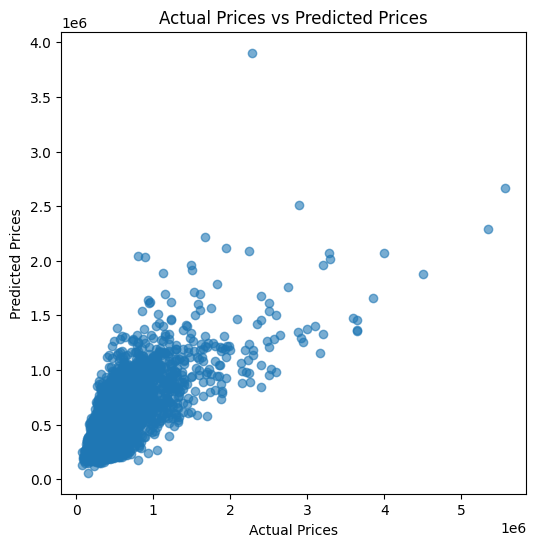

In [70]:
# Visualize Results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Predict the price of a new house using the trained model.

In [71]:
# Predict Custom Data
new_house = pd.DataFrame({
    'sqft_living': [2000],
    'bedrooms': [3],
    'bathrooms': [2],
    'floors': [1]
})

predicted_price = model.predict(new_house)
print("House Price is:", predicted_price)

House Price is: [535176.84180524]
